### 1. Import packages

In [1]:
#!conda install --yes -c conda-forge umap-learn
#!pip install umap-learn
#!pip install "umap-learn[plot]"
#!pip install scikit-multilearn
#!pip install imbalanced-learn

In [2]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import sklearn as sk

import sklearn.metrics as metrics
import os
import pickle

from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
import umap
from umap import UMAP
import plotly.express as px
from statsmodels.stats.multitest import multipletests
import scipy.stats as stats
#import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

In [4]:
plt.style.use('ggplot')
import itertools   

In [5]:
import plotly.graph_objects as go
import plotly.express as px

In [6]:
from combat.pycombat import pycombat

In [134]:
from sklearn.cross_decomposition import PLSRegression

In [7]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})

### 2. Read in peptides (Precursor.Id rows)

In [8]:
prec = pd.read_csv(r'C:\\Users\\momenzadeha\\Documents\aneurysm_study\LeonFine_PrecursorID_GFlibrary_DIANN.csv',index_col=0) 

In [9]:
meta = pd.read_csv(r'C:\\Users\\momenzadeha\\Documents\aneurysm_study\LF_MetaData.csv',index_col=0)

In [10]:
batches = pd.read_csv(r'C:\\Users\\momenzadeha\\Documents\aneurysm_study\batches.csv', index_col=0)

### 3. Clean Peptide and Meta Data

#### Clean peptides

In [11]:
prec.shape

(215, 8245)

In [12]:
prec.drop(['Injection','PeptideCompleteness'],axis=1,inplace=True)

In [13]:
prec.shape

(215, 8243)

In [14]:
prec_out=prec[['Group']]

In [15]:
#216 plasma samples
#DTAA - descending aortic aneurysm
#Type B - dissection only
#BDTAA - mixed aneurysm & dissection
#Control Healthy - no CAD
#Control CAD - asx CAD (RF for DTAA)

prec_out.value_counts()

Group         
TYPE B            78
DTAA              67
ControlHealthy    28
ControlCAD        24
BDTAA             18
dtype: int64

<AxesSubplot:>

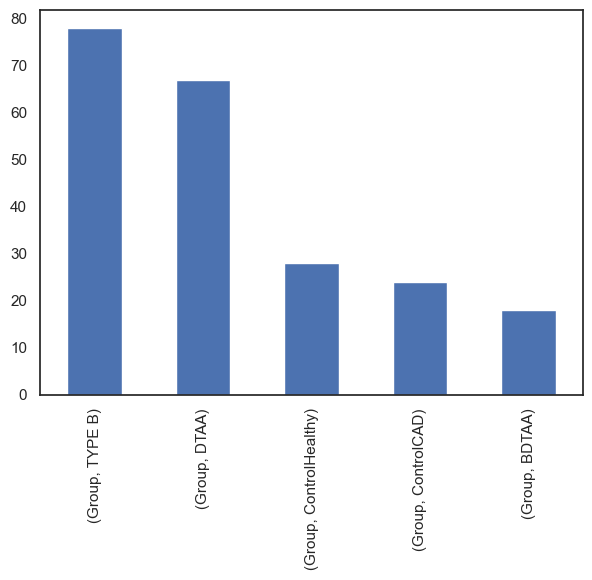

In [16]:
prec_out.apply(pd.value_counts).T.stack().plot(kind='bar')
#plt.savefig("cohorthist", dpi=600,  bbox_inches='tight')

In [17]:
#drop cols where at least 1 element is missing
prec_drop=prec.dropna(axis=1)

In [18]:
prec_drop.shape

(215, 1472)

In [19]:
len(prec_drop.index.unique())

212

In [1]:
#find duplicate rows + drop 4 samples who had duplicate rows in peptide data
#prec_drop[prec_drop.index.duplicated(keep=False)]
#code removed due to PHI

In [21]:
prec_all=prec_drop.copy()

In [23]:
prec_all.shape 

(208, 1472)

In [24]:
len(prec_all.index.unique())

208

In [25]:
prec_all.Group.value_counts()

TYPE B            78
DTAA              62
ControlHealthy    28
ControlCAD        24
BDTAA             16
Name: Group, dtype: int64

In [26]:
prec_all[['Group']] = prec_all[['Group']].replace(['TYPE B'], [0])

In [27]:
prec_all[['Group']] = prec_all[['Group']].replace(['DTAA'], [1])

In [28]:
prec_all[['Group']] = prec_all[['Group']].replace(['ControlHealthy'], [2])

In [29]:
prec_all[['Group']] = prec_all[['Group']].replace(['ControlCAD'], [3])

In [30]:
prec_all[['Group']] = prec_all[['Group']].replace(['BDTAA'], [4])

#### Clean meta data

In [31]:
#drop rows with at least 1 NaN 
meta_drop=meta.dropna()

In [32]:
meta_drop.shape

(216, 5)

In [33]:
len(meta_drop.index.unique())

214

In [2]:
#find duplicate rows + drop 4 samples who had duplicate rows 
#meta_drop[meta_drop.index.duplicated(keep=False)]
#code removed due to PHI

In [36]:
len(meta_drop.index.unique())

210

In [37]:
meta_all=meta_drop.copy()

In [38]:
meta_all.Group.value_counts()

DTAA              62
TypeB             56
ControlCAD        30
ControlHealthy    30
TYPE B            19
BDTAA             13
Name: Group, dtype: int64

In [39]:
meta_all[['Group']] = meta_all[['Group']].replace(['TYPE B'], [0])

In [40]:
meta_all[['Group']] = meta_all[['Group']].replace(['TypeB'], [0])

In [41]:
meta_all[['Group']] = meta_all[['Group']].replace(['DTAA'], [1])

In [42]:
meta_all[['Group']] = meta_all[['Group']].replace(['ControlHealthy'], [2])

In [43]:
meta_all[['Group']] = meta_all[['Group']].replace(['ControlCAD'], [3])

In [44]:
meta_all[['Group']] = meta_all[['Group']].replace(['BDTAA'], [4])

In [45]:
meta_all['Group'].value_counts()

0    75
1    62
3    30
2    30
4    13
Name: Group, dtype: int64

In [46]:
meta_all['Collection Tube'].value_counts()

EDTA-K2                  165
Acid Citrate Dextrose     43
Heparin                    2
Name: Collection Tube, dtype: int64

In [47]:
meta_all['Sex'].value_counts()

MALE      120
FEMALE     90
Name: Sex, dtype: int64

In [48]:
meta_all['Race'].value_counts()

CAUCASIAN                 82
AFRICAN AMERICAN/BLACK    64
Caucasian                 32
HISPANIC/LATINO           21
Hispanic/Latino            7
Asian/Pacific Islander     1
0                          1
OTHER (SPECIFY)            1
ASIAN                      1
Name: Race, dtype: int64

In [49]:
meta_all[['Race']] = meta_all[['Race']].replace(['Caucasian'], ['CAUCASIAN'])

In [50]:
meta_all[['Race']] = meta_all[['Race']].replace(['Hispanic/Latino'], ['HISPANIC/LATINO'])

In [51]:
meta_all[['Race']] = meta_all[['Race']].replace(['Asian/Pacific Islander'], ['ASIAN'])

In [52]:
meta_all[['Race']] = meta_all[['Race']].replace(['OTHER (SPECIFY)'], ['OTHER'])

In [53]:
meta_all[['Race']] = meta_all[['Race']].replace(['0'], ['OTHER'])

In [54]:
meta_all['Race'].value_counts()

CAUCASIAN                 114
AFRICAN AMERICAN/BLACK     64
HISPANIC/LATINO            28
ASIAN                       2
OTHER                       2
Name: Race, dtype: int64

#### Merge meta and peptides

In [66]:
prec_all.shape

(208, 1472)

In [56]:
meta_prec=meta_all.merge(prec_all, left_index=True, right_index=True)

In [57]:
meta_prec.shape

(202, 1477)

In [58]:
len(meta_prec)

202

In [59]:
meta_prec.Group_x.value_counts()

0    75
1    62
2    28
3    24
4    13
Name: Group_x, dtype: int64

In [60]:
meta_prec.Group_y.value_counts()

0    75
1    62
2    28
3    24
4    13
Name: Group_y, dtype: int64

In [61]:
meta_prec.drop(['Group_y'],axis=1,inplace=True)

In [62]:
meta_prec.rename(columns={'Group_x':'Group'}, inplace=True)

In [63]:
#with open(r'/Users/momenzadeha/Documents/aneurysm_study/meta_prec.pkl', 'wb') as handle:
    #pickle.dump(meta_prec, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [64]:
prec_in=meta_prec.iloc[:,5:]

In [65]:
prec_in.shape

(202, 1471)

### 4. Make Disease vs Control groups

In [67]:
# disease groups 0,1,4 => 0
# control group 2,3 => 1

In [68]:
prec_2_gr=meta_prec.copy()

In [69]:
prec_2_gr[['Group']] = prec_2_gr[['Group']].replace([0], [0])

In [70]:
prec_2_gr[['Group']] = prec_2_gr[['Group']].replace([1], [0])

In [71]:
prec_2_gr[['Group']] = prec_2_gr[['Group']].replace([4], [0])

In [72]:
prec_2_gr[['Group']] = prec_2_gr[['Group']].replace([2], [1])

In [73]:
prec_2_gr[['Group']] = prec_2_gr[['Group']].replace([3], [1])

In [74]:
prec_2_gr.Group.value_counts()

0    150
1     52
Name: Group, dtype: int64

In [77]:
#with open(r'/Users/momenzadeha/Documents/aneurysm_study/prec_2_gr.pkl', 'wb') as handle:
    #pickle.dump(prec_2_gr, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 5. Log2 transform

In [75]:
num = 0
for i in prec_in.columns:
   num += prec_in[i][prec_in[i]==0].count()
num

3

In [76]:
prec_in_log=np.log2(prec_in.T)

C:\Users\momenzadeha\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [77]:
prec_in_log.index[np.isinf(prec_in_log).any(1)]

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_95828\745634646.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  prec_in_log.index[np.isinf(prec_in_log).any(1)]


Index(['(UniMod:26)CLKDGAGDVAFVK2',
       '(UniMod:28)QNC(UniMod:4)DQFEKLGEY(UniMod:21)GFQNALIVR4',
       'M(UniMod:35)GPTELLIEMEDWKGDK3'],
      dtype='object')

In [78]:
#replace zeros with NaN in prec_in
prec_in.replace([0.0], np.NaN, inplace=True)

In [79]:
np.any(np.isnan(prec_in))

True

In [80]:
#drop precursors where at least 1 element is NaN
prec_in=prec_in.dropna(axis=1)

In [81]:
#check for zero's again - should be 0
num = 0
for i in prec_in.columns:
   num += prec_in[i][prec_in[i]==0].count()
num

0

In [82]:
#now 3 cols smaller
prec_in.shape

(202, 1468)

In [83]:
#log transform clean df (no zeros) by sample 
prec_in_drop_log=np.log2(prec_in.T)

In [84]:
prec_in_drop_log.shape

(1468, 202)

In [85]:
#should not be any NaNs now
np.any(np.isnan(prec_in_drop_log))

False

In [86]:
#all #s should be finite
np.all(np.isfinite(prec_in_drop_log))

True

In [87]:
prec_in_drop_log.T.shape

(202, 1468)

In [88]:
prec_in_log=prec_in_drop_log.T

### 6. Merge log transformed data with meta

In [93]:
meta_logprec=meta_all.merge(prec_in_log, left_index=True, right_index=True)

In [94]:
meta_logprec_all=meta_logprec.reset_index().merge(batches.reset_index(), 
                                                how='left', on='index').set_index('index')

In [95]:
meta_logprec_b=meta_logprec_all.drop(['Collection Tube','Age','Sex','Race', 'Group'],axis=1)

In [96]:
meta_logprec_b.index.equals(prec_in_log.index)

True

In [97]:
meta_logprec_b.index.equals(meta_logprec.index)

True

In [99]:
reducer = umap.UMAP(min_dist=1, random_state=0)

In [100]:
embedding = reducer.fit_transform(meta_logprec_b.iloc[:,:-1])
embedding.shape

(202, 2)

In [101]:
cmap = plt.get_cmap("tab20")
blue = cmap(np.array([0]))
orange = cmap(np.array([2]))
green = cmap(np.array([4]))
red = cmap(np.array([6]))
purple = cmap(np.array([8]))

In [102]:
categories = meta_logprec.Group

colormap = np.array([blue, orange, green, red,purple])

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0],embedding[:, 1], s=50, c=colormap[categories])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Unsupervised UMAP Log Before Combat', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)

b_patch = mpatches.Patch(color=blue, label='TYPE B')
o_patch = mpatches.Patch(color=orange, label='DTAA')
g_patch = mpatches.Patch(color=green, label='Control Healthy')
r_patch = mpatches.Patch(color=red, label='Control CAD')
p_patch = mpatches.Patch(color=purple, label='BDTAA')


plt.legend(handles=[b_patch, o_patch, g_patch, r_patch, p_patch], fontsize=15, loc='center left', 
           bbox_to_anchor=(1, 0.5))

plt.show()
#plt.savefig("umap_precraw.jpg", dpi=600,  bbox_inches='tight')

In [103]:
data_corrected = pycombat(meta_logprec_b.iloc[:,:-1].T,meta_logprec_b.iloc[:,-1])

Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


C:\Users\momenzadeha\AppData\Roaming\Python\Python39\site-packages\combat\pycombat.py:166: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  adjust = np.asarray([g_new, d_new])


In [104]:
meta_logprec_b.iloc[:,-1].value_counts()

1    82
2    75
3    34
4    11
Name: Batch, dtype: int64

In [105]:
#with open(r'/Users/momenzadeha/Documents/aneurysm_study/prec_bcorr.pkl', 'wb') as handle:
    #pickle.dump(data_corrected.T, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [106]:
meta_logprec_b.index.equals(data_corrected.T.index)

True

In [107]:
reducer = umap.UMAP(min_dist=1, random_state=0)

In [108]:
embedding = reducer.fit_transform(data_corrected.T)
embedding.shape

(202, 2)

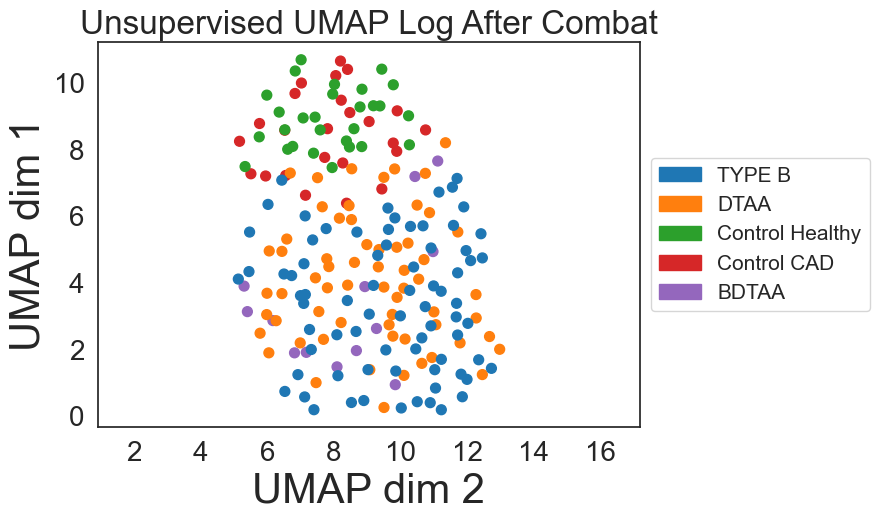

In [109]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0],embedding[:, 1], s=50, c=colormap[categories])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Unsupervised UMAP Log After Combat', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)

b_patch = mpatches.Patch(color=blue, label='TYPE B')
o_patch = mpatches.Patch(color=orange, label='DTAA')
g_patch = mpatches.Patch(color=green, label='Control Healthy')
r_patch = mpatches.Patch(color=red, label='Control CAD')
p_patch = mpatches.Patch(color=purple, label='BDTAA')


plt.legend(handles=[b_patch, o_patch, g_patch, r_patch, p_patch], fontsize=15, loc='center left', 
           bbox_to_anchor=(1, 0.5))

plt.show()
#plt.savefig("umap_precraw.jpg", dpi=600,  bbox_inches='tight')

In [110]:
cmap = plt.get_cmap("tab20c")
blue = cmap(np.array([0]))
orange = cmap(np.array([4]))

In [111]:
categories = prec_2_gr.Group

colormap = np.array([blue, orange])

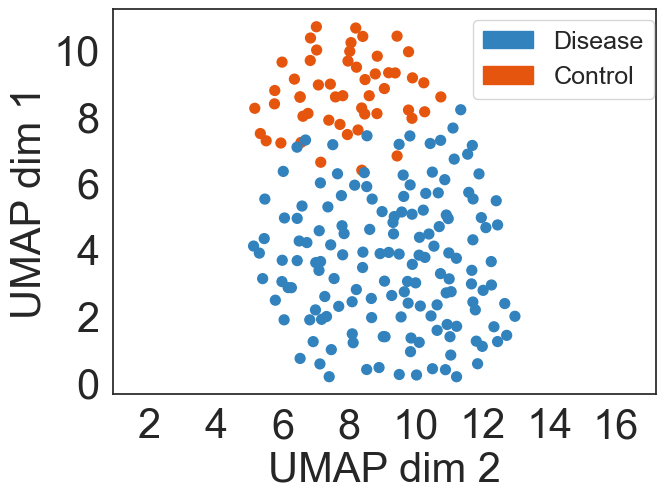

In [112]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0],embedding[:, 1], s=50, c=colormap[categories])

plt.gca().set_aspect('equal', 'datalim')
#plt.title('Unsupervised UMAP Log+Combat Dx vs C', fontsize=24)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)

b_patch = mpatches.Patch(color=blue, label='Disease')
o_patch = mpatches.Patch(color=orange, label='Control')

plt.legend(handles=[b_patch, o_patch], fontsize=18, loc='right', 
           bbox_to_anchor=(1.02, 0.87))

#plt.savefig('logUMAPPep_bcorr.svg',bbox_inches='tight')
plt.show()

In [113]:
emb_df = pd.DataFrame(embedding, columns = ['emb0','emb1'])

In [114]:
meta_logprec_all
prec_2_gr[['Group']] = prec_2_gr[['Group']].replace([3], [1])

In [115]:
emb_df['samples']=prec_2_gr.index

In [116]:
emb_df=emb_df.set_index('samples')

In [117]:
emb_df_allgroups=emb_df.merge(meta_logprec_all.Group, left_index=True, right_index=True)

In [118]:
emb_df_allgroups.Group.value_counts()

0    75
1    62
2    28
3    24
4    13
Name: Group, dtype: int64

In [119]:
emb_df_allgroups[['Group']] = emb_df_allgroups[['Group']].replace([0], ['Type B'])
emb_df_allgroups[['Group']] = emb_df_allgroups[['Group']].replace([1], ['DTAA'])
emb_df_allgroups[['Group']] = emb_df_allgroups[['Group']].replace([2], ['Healthy'])
emb_df_allgroups[['Group']] = emb_df_allgroups[['Group']].replace([3], ['CAD'])
emb_df_allgroups[['Group']] = emb_df_allgroups[['Group']].replace([4], ['BDTAA'])

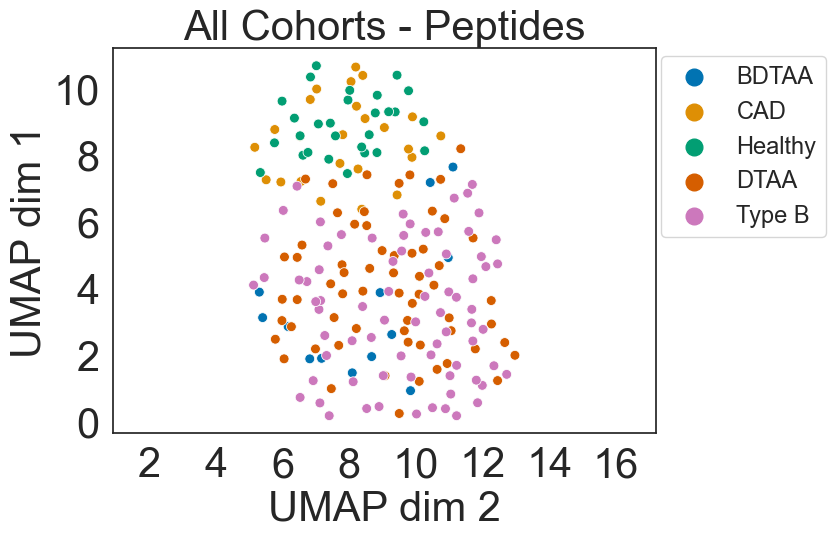

In [120]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=emb_df_allgroups, x="emb0", y="emb1", hue="Group", s=50,palette='colorblind')
plt.gca().set_aspect('equal', 'datalim')
plt.title('All Cohorts - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF1_ALL.svg",  bbox_inches='tight')
plt.show()

In [121]:
emb_df=emb_df.merge(prec_2_gr.Group, left_index=True, right_index=True)

In [122]:
combemb_meta=emb_df.merge(meta_logprec_all[['Collection Tube','Age','Sex','Race','Batch']],
                          left_index=True, right_index=True)

In [123]:
combemb_meta[['Group']] = combemb_meta[['Group']].replace([0], ['Disease'])

In [124]:
combemb_meta[['Group']] = combemb_meta[['Group']].replace([1], ['Control'])

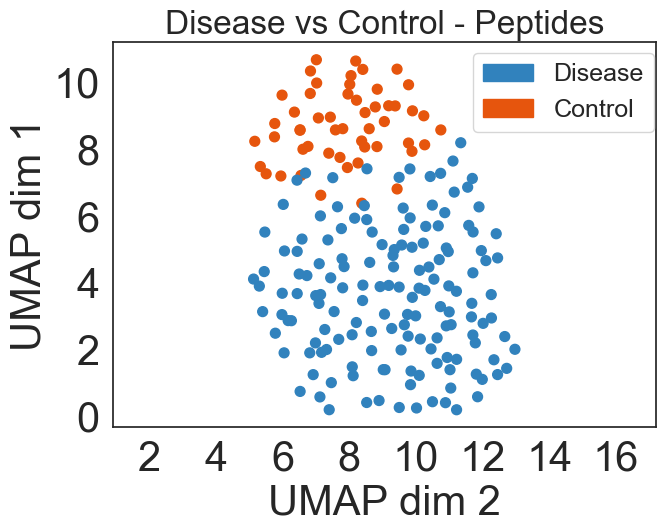

In [125]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0],embedding[:, 1], s=50, c=colormap[categories])

plt.gca().set_aspect('equal', 'datalim')
plt.title('Disease vs Control - Peptides', fontsize=24)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)

b_patch = mpatches.Patch(color=blue, label='Disease')
o_patch = mpatches.Patch(color=orange, label='Control')

plt.legend(handles=[b_patch, o_patch], fontsize=18, loc='right', 
           bbox_to_anchor=(1.02, 0.87))

plt.show()

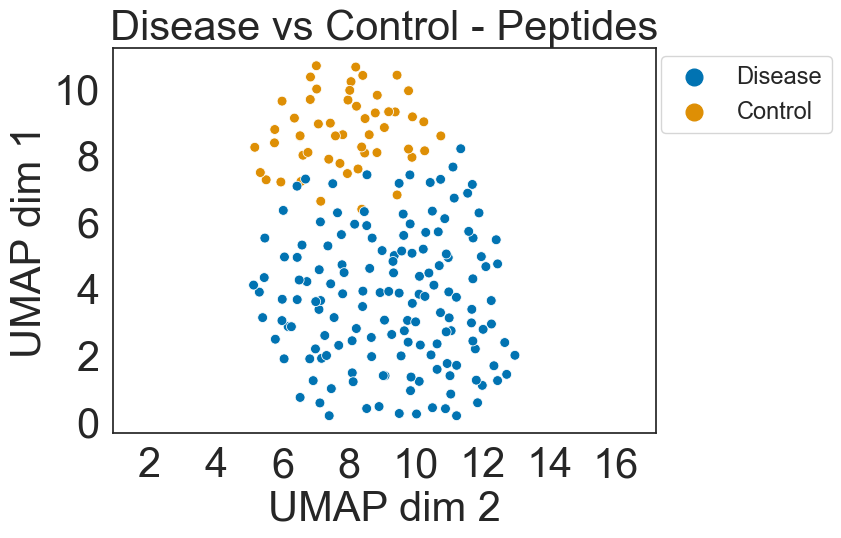

In [126]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=combemb_meta, x="emb0", y="emb1", hue="Group", s=50,palette='colorblind')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Disease vs Control - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF2_DC.svg",  bbox_inches='tight')
plt.show()

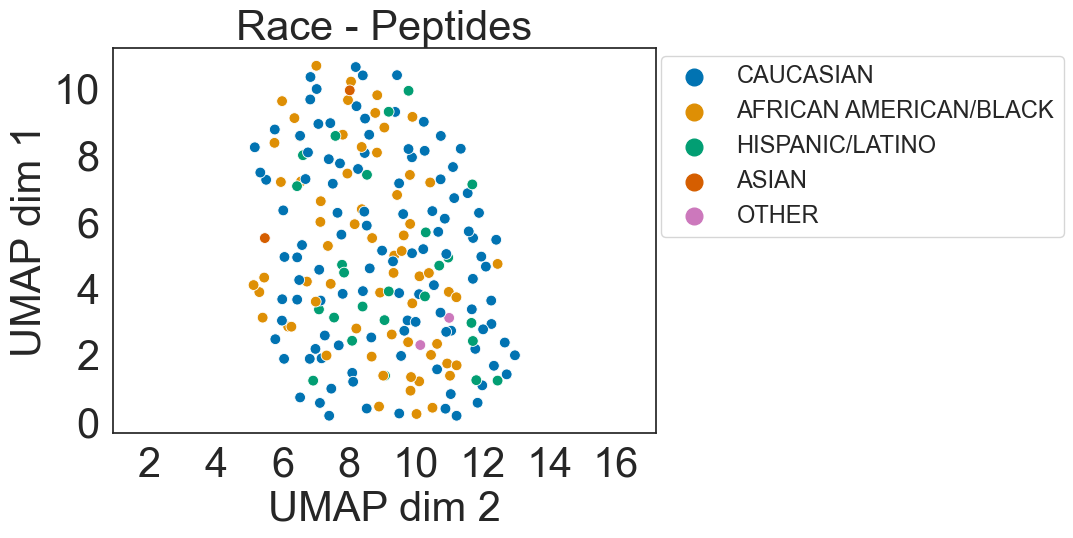

In [127]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=combemb_meta, x="emb0", y="emb1", hue="Race", s=60, palette='colorblind')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Race - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF2_race.svg",  bbox_inches='tight')
plt.show()

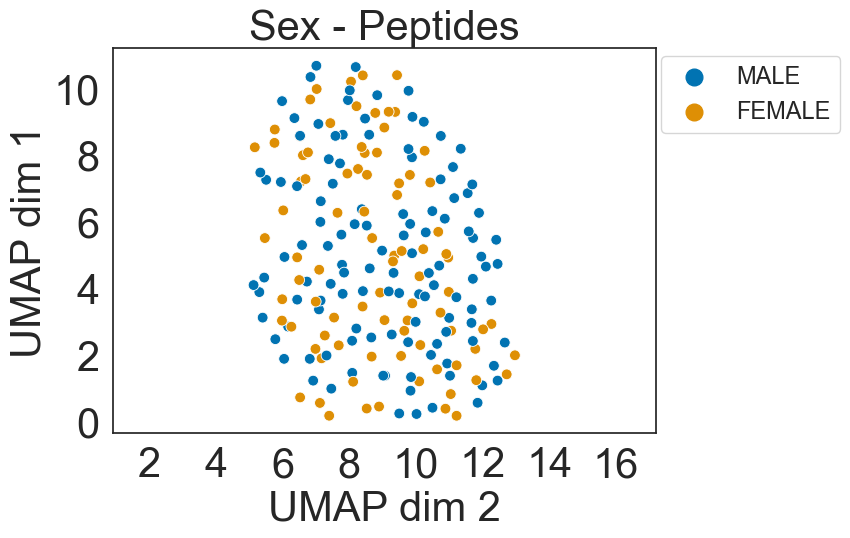

In [128]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=combemb_meta, x="emb0", y="emb1", hue="Sex", s=60, palette='colorblind')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Sex - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF2_sex.svg",  bbox_inches='tight')
plt.show()

In [129]:
combemb_meta['Age_bin'] = pd.cut(combemb_meta['Age'], np.arange(17, 89, step=10))

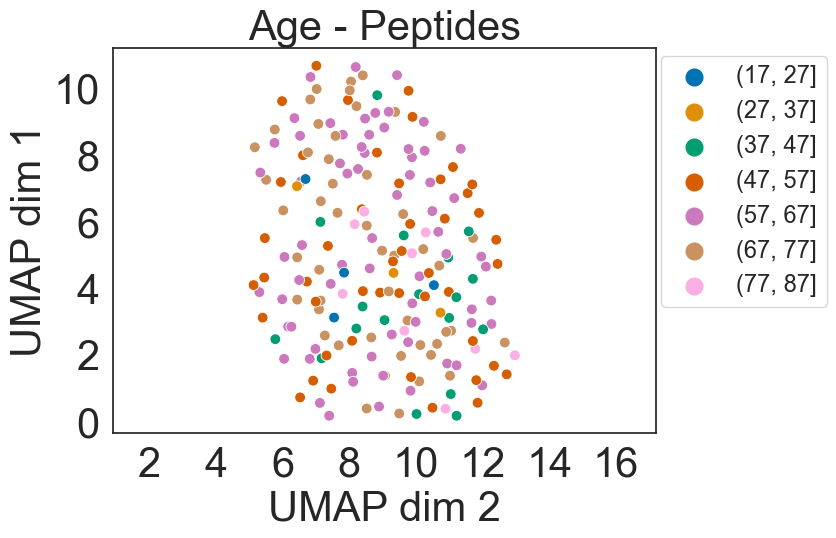

In [130]:
plt.figure(figsize=(7,5))

sns.scatterplot(data=combemb_meta, x="emb0", y="emb1", hue='Age_bin', s=60, palette="colorblind")

plt.gca().set_aspect('equal', 'datalim')
plt.title('Age - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF2_age.svg",  bbox_inches='tight')
plt.show()

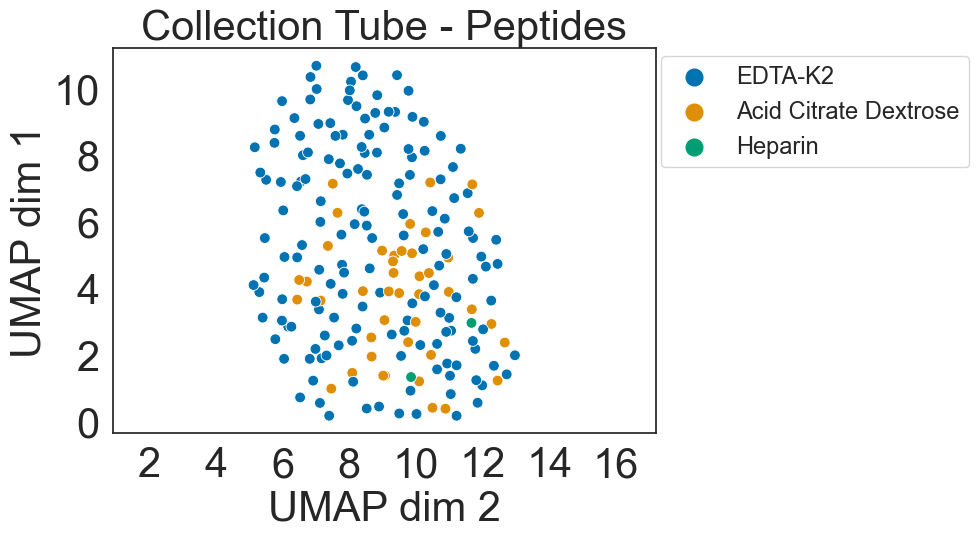

In [131]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=combemb_meta, x="emb0", y="emb1", hue="Collection Tube", s=60, palette='colorblind')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Collection Tube - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF2_CT.svg",  bbox_inches='tight')
plt.show()

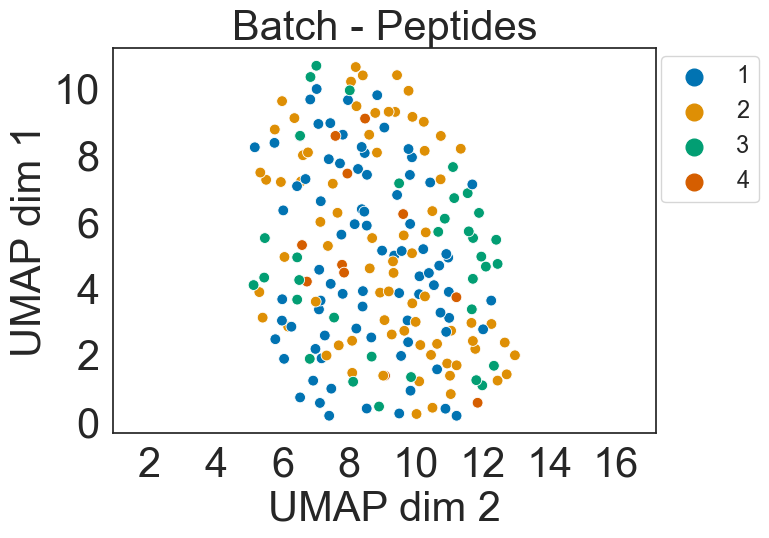

In [132]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=combemb_meta, x="emb0", y="emb1", hue="Batch", s=60, palette='colorblind')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Batch - Peptides', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('UMAP dim 1', fontsize=30)
plt.xlabel('UMAP dim 2', fontsize=30)
plt.legend(bbox_to_anchor=(1.01, 0.98), loc='upper left', borderaxespad=0, prop={'size': 17}, markerscale=2,)
#plt.savefig("suppF2_batch.svg",  bbox_inches='tight')
plt.show()

### 7. PLS-DA

In [133]:
prec_y = np.array(prec_2_gr.Group, dtype=int)

In [135]:
plsr = PLSRegression(n_components=2)
plsr.fit(data_corrected.T, prec_y)

scores = pd.DataFrame(plsr.x_scores_)
scores.shape

(202, 2)

<Figure size 700x500 with 0 Axes>

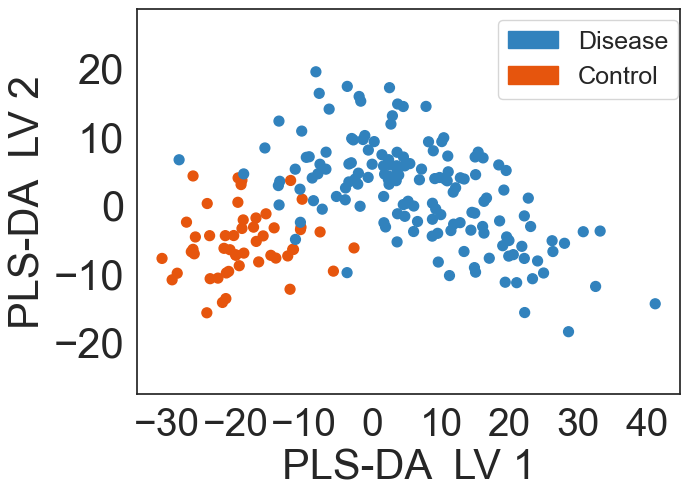

In [136]:
#LV=latent Variable
plt.figure(figsize=(7,5))
scores.index=data_corrected.columns

ax = scores.plot(x=0, y=1, kind='scatter', s=50, c=colormap[categories])
ax.set_xlabel('PLS-DA  LV 1',fontsize=30)
ax.set_ylabel('PLS-DA  LV 2',fontsize=30)

plt.gca().set_aspect('equal', 'datalim')
#plt.title('PLS-DA (Log+Combat Dx vs C)', fontsize=24)
plt.xticks(fontsize=28)
plt.yticks(fontsize=30)

b_patch = mpatches.Patch(color=blue, label='Disease')
o_patch = mpatches.Patch(color=orange, label='Control')

plt.legend(handles=[b_patch, o_patch], fontsize=18, loc='right', 
           bbox_to_anchor=(1.02, 0.87))
#plt.savefig('PLSDAPrec_bcorr.svg', dpi=600,bbox_inches='tight')
plt.show()

### 8. T-test/BH disease vs control - find significant peptides

In [137]:
prec_all=data_corrected.T.merge(prec_2_gr.Group, left_index=True, right_index=True)

In [138]:
prec_all_melt = pd.melt(prec_all, id_vars=['Group'], value_vars=data_corrected.T.columns.tolist())
prec_all_melt.shape

(296536, 3)

In [139]:
prec_all_melt=prec_all_melt.rename(columns={"variable": "Precursors"})

In [140]:
prec_all_melt['Group'] = prec_all_melt['Group'].astype('int')

In [141]:
pvalues=[]
i=0
for x in prec_all_melt['Precursors'].unique():
    tempdf = prec_all_melt[prec_all_melt.isin([x]).any(axis=1)]
    coh0=[]
    coh1=[]
    coh0.append(tempdf[(tempdf.Group==0)]['value'].tolist())
    coh1.append(tempdf[(tempdf.Group==1)]['value'].tolist())
    #print('cohort  0:', coh0)
    #print('++++++++')
    ab = itertools.chain(coh0, coh1)
    data=list(ab)
    t_val, p_val = stats.ttest_ind(*data)
    pvalues.append(p_val)
    #print('p_value:', p_val)
    #print('++++++++')
    i+=1
    if i % 100==0: 
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


#### Benjamini and Hochberg FDR

In [142]:
y=multipletests(pvals=pvalues, alpha=0.05, method="fdr_bh")

In [143]:
len(y[1])

1468

In [144]:
#find how many pvalues are < 0.01
print(len(y[1][np.where(y[1]<0.01)])) 

853


In [145]:
T=np.where(y[1] <0.01)

In [146]:
prec_all_melt['Precursors'].unique()[T].shape

(853,)

In [147]:
comb_sig_prec=prec_all[prec_all_melt['Precursors'].unique()[T]]

In [148]:
comb_sig_prec.shape

(202, 853)

In [149]:
#with open(r'/Users/momenzadeha/Documents/aneurysm_study/sigprec_bcorr.pkl', 'wb') as handle:
    #pickle.dump(comb_sig_prec, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Volcano Plot

In [150]:
prec_all=data_corrected.T.merge(prec_2_gr.Group, left_index=True, right_index=True)

In [151]:
prec_all.shape

(202, 1469)

In [152]:
prec_all.Group.value_counts()

0    150
1     52
Name: Group, dtype: int64

In [153]:
#0=disease
comb_prec_zero=prec_all.loc[prec_all['Group'] == 0]

In [154]:
#1=control
comb_prec_one=prec_all.loc[prec_all['Group'] == 1]

In [155]:
comb_prec_zero=comb_prec_zero.drop(['Group'],axis=1)

In [156]:
comb_prec_one=comb_prec_one.drop(['Group'],axis=1)

In [157]:
combprec_inT=data_corrected.reset_index()

In [158]:
combprec_inT.shape

(1468, 203)

In [159]:
combprec_inT['mean0'] = comb_prec_zero.mean().tolist()

In [160]:
combprec_inT['mean1'] = comb_prec_one.mean().tolist()

In [161]:
comb_vol=combprec_inT[['index','mean0','mean1']]

In [162]:
comb_vol['log_fc'] = comb_vol['mean0'] - comb_vol['mean1']

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_95828\2102689565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_vol['log_fc'] = comb_vol['mean0'] - comb_vol['mean1']


In [163]:
comb_vol['neg_log_pval']=np.log10(y[1]) * (-1)

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_95828\1262458070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_vol['neg_log_pval']=np.log10(y[1]) * (-1)


In [164]:
comb_vol.columns

Index(['index', 'mean0', 'mean1', 'log_fc', 'neg_log_pval'], dtype='object', name='index')

Text(0.5, 0, 'Difference of Group Means')

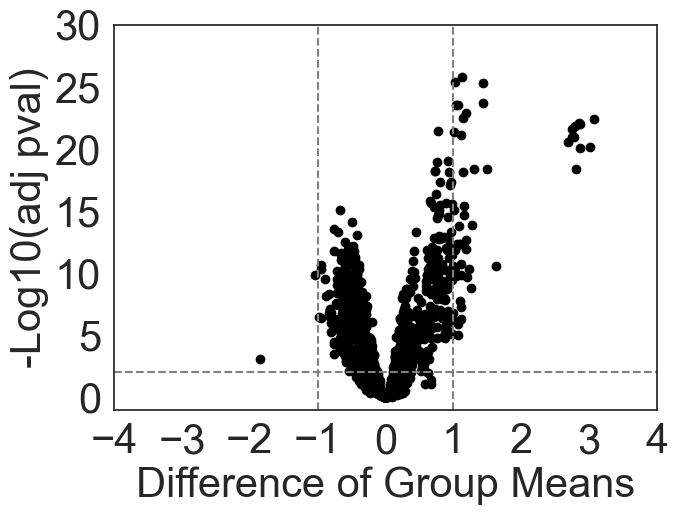

In [166]:
plt.figure(figsize=(7,5))
plt.scatter(x=comb_vol['log_fc'], y=comb_vol['neg_log_pval'], c='black')

plt.axhline(y=np.log10(0.01) * (-1), linestyle='--',c='grey')
plt.axvline(x=-1, linestyle='--', c='grey')
plt.axvline(x=1, linestyle='--', c='grey')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(-4,4)
plt.ylim(-1,30)
plt.ylabel("-Log10(adj pval)", fontsize=30)
plt.xlabel("Difference of Group Means", fontsize=30)
#plt.savefig('VolPep_bcorr.svg', bbox_inches='tight')

In [167]:
antilog_corr_data=2**(data_corrected.iloc[:,:-1])

In [168]:
comb_prec_all_anti=antilog_corr_data.T.merge(prec_2_gr.Group, left_index=True, right_index=True)

In [169]:
anticomb_prec_zero=comb_prec_all_anti.loc[comb_prec_all_anti['Group'] == 0]

In [170]:
anticomb_prec_one=comb_prec_all_anti.loc[comb_prec_all_anti['Group'] == 1]

In [171]:
anticomb_prec_zero=anticomb_prec_zero.drop(['Group'],axis=1)

In [172]:
anticomb_prec_one=anticomb_prec_one.drop(['Group'],axis=1)

In [173]:
anticombprec_inT=antilog_corr_data.reset_index()

In [174]:
anticombprec_inT['mean0'] = anticomb_prec_zero.mean().tolist()

In [175]:
anticombprec_inT['mean1'] = anticomb_prec_one.mean().tolist()

In [176]:
anticomb_vol=anticombprec_inT[['index','mean0','mean1']]

In [177]:
anticomb_vol['meand_diff'] = anticomb_vol['mean0'] - anticomb_vol['mean1']

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_95828\3324569307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anticomb_vol['meand_diff'] = anticomb_vol['mean0'] - anticomb_vol['mean1']


In [178]:
anticomb_vol['logFC'] = np.log2(anticomb_vol['mean0']) - np.log2(anticomb_vol['mean1'])

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_95828\2772738539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anticomb_vol['logFC'] = np.log2(anticomb_vol['mean0']) - np.log2(anticomb_vol['mean1'])


In [179]:
anticomb_vol['neg_log_pval']=np.log10(y[1]) * (-1)

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_95828\3020715737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anticomb_vol['neg_log_pval']=np.log10(y[1]) * (-1)


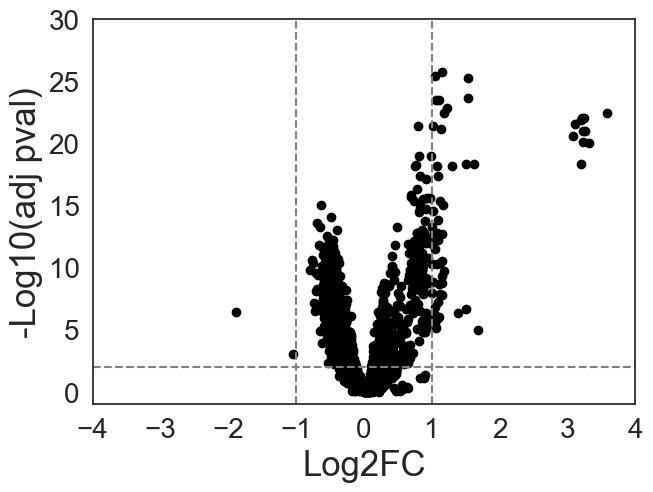

In [180]:
plt.figure(figsize=(7,5))
plt.scatter(x=anticomb_vol['logFC'], y=anticomb_vol['neg_log_pval'], c='black')

plt.axhline(y=np.log10(0.01) * (-1), linestyle='--',c='grey')
plt.axvline(x=-1, linestyle='--', c='grey')
plt.axvline(x=1, linestyle='--', c='grey')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-4,4)
plt.ylim(-1,30)
plt.ylabel("-Log10(adj pval)", fontsize=25)
plt.xlabel("Log2FC", fontsize=25)
#plt.savefig('Volpep_bcorr.svg', bbox_inches='tight')